## Import

In [35]:
import pandas as pd
import numpy as np

# Id3Estimator has dependency errors
import six
import sys
sys.modules['sklearn.externals.six'] = six

from id3 import Id3Estimator
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

## Data

In [24]:
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
print(X.shape, y.shape)

(569, 30) (569,)


In [107]:
features, targets = breast_cancer.feature_names, breast_cancer.target_names
print(features, target)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] malignant/benign


In [22]:
# iris = load_iris()
# X, y = iris.data, iris.target
# print(X.shape, y.shape)

(150, 4) (150,)


In [23]:
# features, target = iris.feature_names, iris.target_names
# print(features, target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


In [60]:
mergedXy = np.append(X, y.reshape(-1, 1), axis=1)
print(merged.shape)

(569, 31)


In [67]:
df = pd.DataFrame(mergedXy, columns=np.append(breast_cancer.feature_names, "malignant/benign"))
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant/benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


## Find correlation and reduce dimensions

<AxesSubplot:>

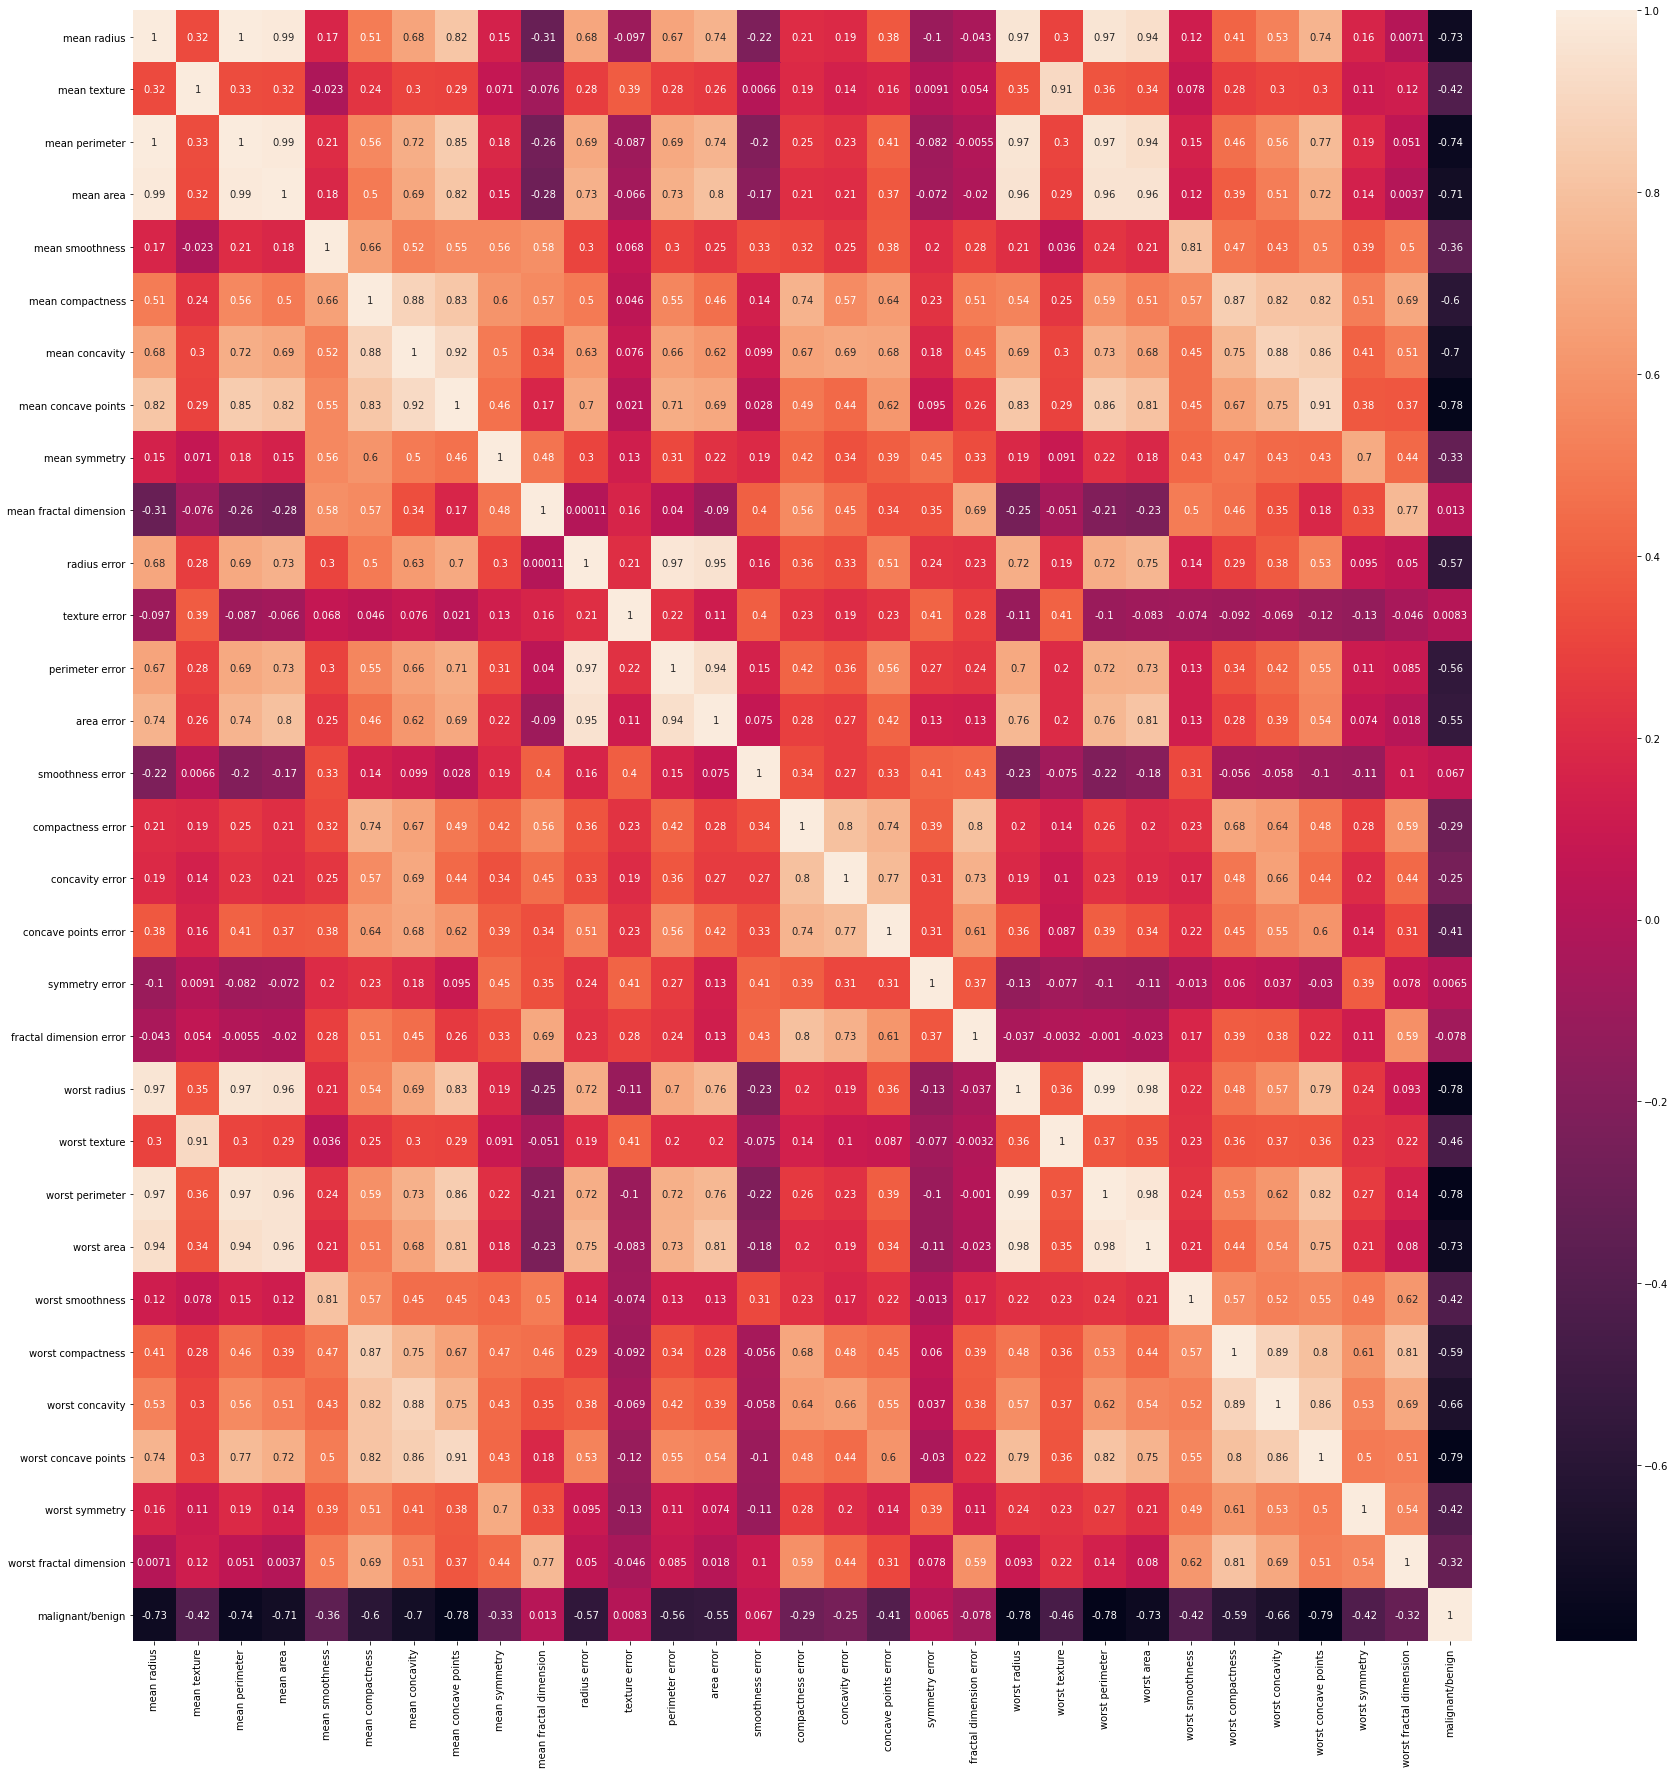

In [77]:
fig, ax = plt.subplots(figsize=(30, 30))

sns.heatmap(df.corr(), annot=True)

## Remove low correlation data

In [119]:
dfcorr = df.corr()

# set thresholds
threshold1, threshold2 = -0.7, 0.7
dfcorr_cleaned = dfcorr.loc[(dfcorr["malignant/benign"] < threshold1) | (dfcorr["malignant/benign"] > threshold2)]
dfcorr_cleaned = dfcorr_cleaned.drop((set(features) - set(dfcorr_cleaned.index)), axis=1)
dfcorr_cleaned

,mean radius,mean perimeter,mean area,mean concave points,worst radius,worst perimeter,worst area,worst concave points,malignant/benign
mean radius,1.000000,0.997855,0.987357,0.822529,0.969539,0.965137,0.941082,0.744214,-0.730029
mean perimeter,0.997855,1.000000,0.986507,0.850977,0.969476,0.970387,0.941550,0.771241,-0.742636
mean area,0.987357,0.986507,1.000000,0.823269,0.962746,0.959120,0.959213,0.722017,-0.708984
mean concave points,0.822529,0.850977,0.823269,1.000000,0.830318,0.855923,0.809630,0.910155,-0.776614
worst radius,0.969539,0.969476,0.962746,0.830318,1.000000,0.993708,0.984015,0.787424,-0.776454
worst perimeter,0.965137,0.970387,0.959120,0.855923,0.993708,1.000000,0.977578,0.816322,-0.782914
worst area,0.941082,0.941550,0.959213,0.809630,0.984015,0.977578,1.000000,0.747419,-0.733825
worst concave points,0.744214,0.771241,0.722017,0.910155,0.787424,0.816322,0.747419,1.000000,-0.793566
malignant/benign,-0.730029,-0.742636,-0.708984,-0.776614,-0.776454,-0.782914,-0.733825,-0.793566,1.000000


In [120]:
dfcorr_cleaned_notarget = dfcorr_cleaned.drop(target, axis=1)
dfcorr_cleaned_notarget

,mean radius,mean perimeter,mean area,mean concave points,worst radius,worst perimeter,worst area,worst concave points
mean radius,1.000000,0.997855,0.987357,0.822529,0.969539,0.965137,0.941082,0.744214
mean perimeter,0.997855,1.000000,0.986507,0.850977,0.969476,0.970387,0.941550,0.771241
mean area,0.987357,0.986507,1.000000,0.823269,0.962746,0.959120,0.959213,0.722017
mean concave points,0.822529,0.850977,0.823269,1.000000,0.830318,0.855923,0.809630,0.910155
worst radius,0.969539,0.969476,0.962746,0.830318,1.000000,0.993708,0.984015,0.787424
worst perimeter,0.965137,0.970387,0.959120,0.855923,0.993708,1.000000,0.977578,0.816322
worst area,0.941082,0.941550,0.959213,0.809630,0.984015,0.977578,1.000000,0.747419
worst concave points,0.744214,0.771241,0.722017,0.910155,0.787424,0.816322,0.747419,1.000000
malignant/benign,-0.730029,-0.742636,-0.708984,-0.776614,-0.776454,-0.782914,-0.733825,-0.793566


## Get the indices of selected features

In [122]:
dfcorr_cleaned_idx = []
for idx, f in enumerate(features):
    if f in dfcorr_cleaned_notarget.columns:
        dfcorr_cleaned_idx.append(idx)
        print(idx, ':', f)

0 : mean radius
2 : mean perimeter
3 : mean area
7 : mean concave points
20 : worst radius
22 : worst perimeter
23 : worst area
27 : worst concave points


## Visualize features

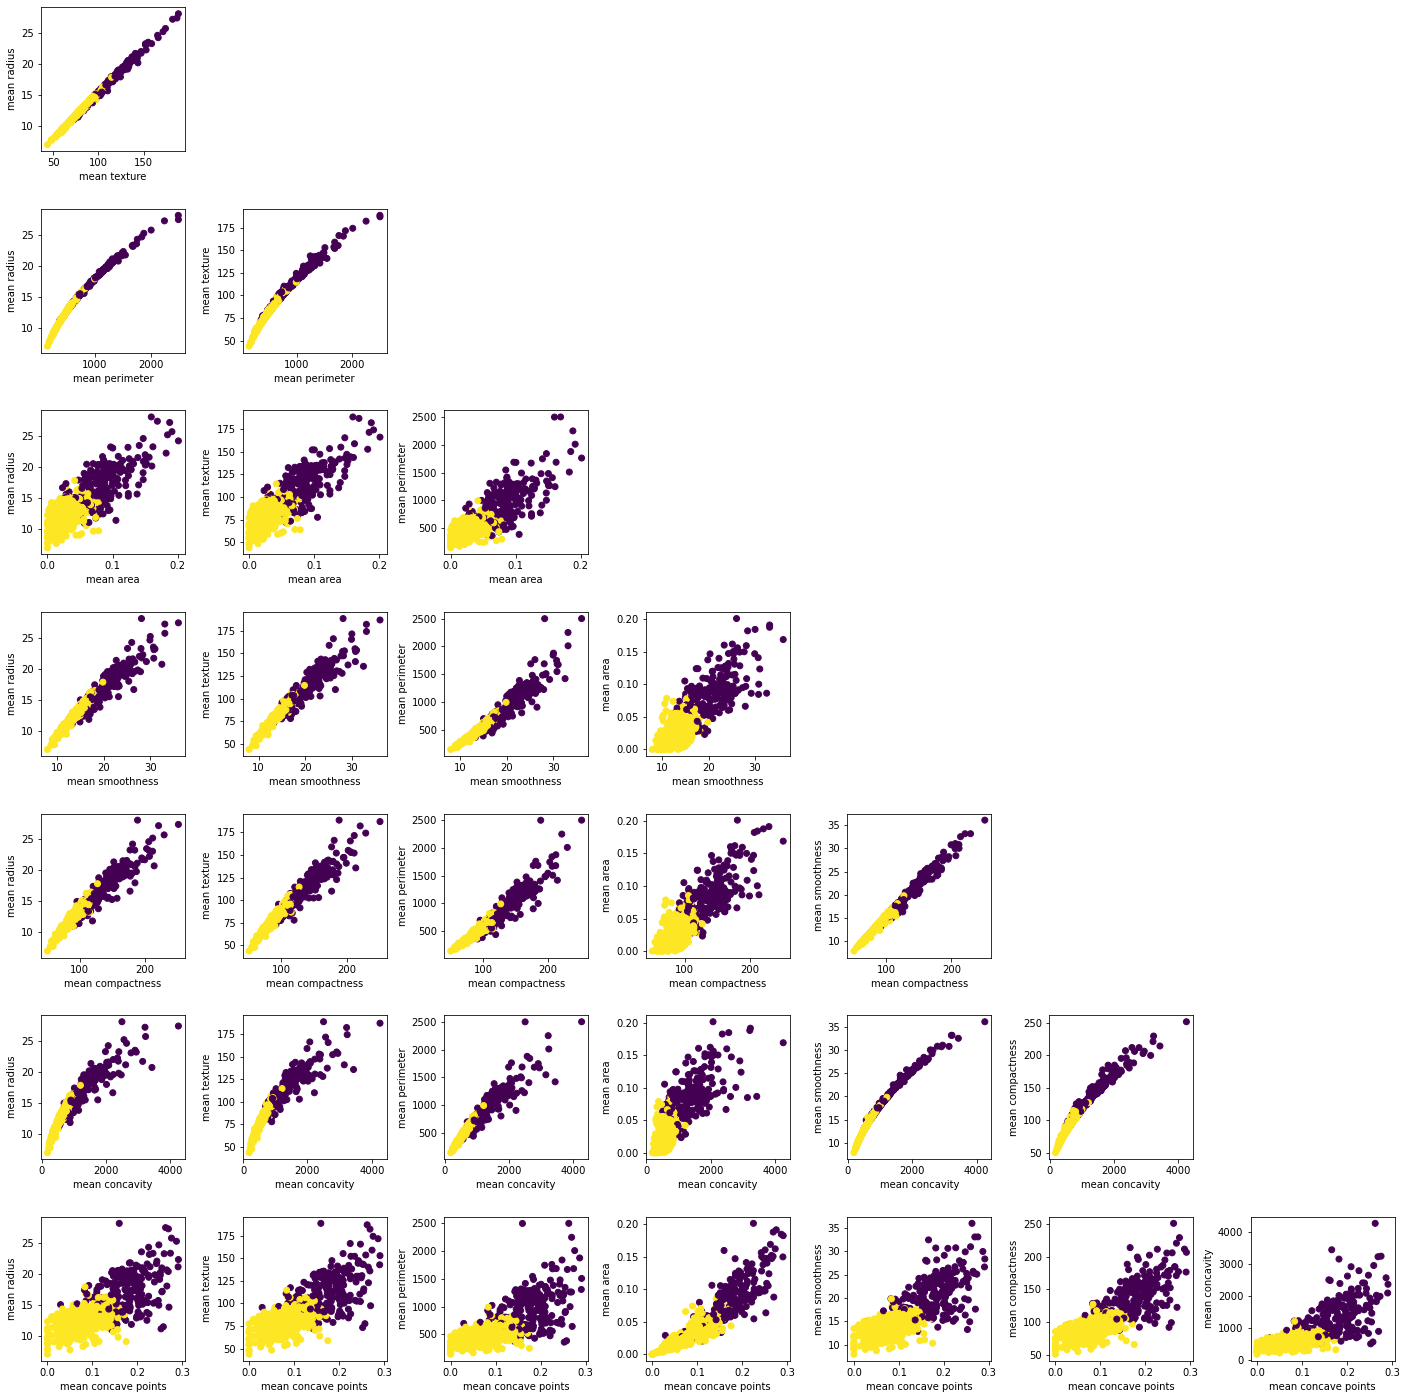

In [124]:
# target = "malignant/benign"
n = len(dfcorr_cleaned_notarget.columns)

fig, ax = plt.subplots(n, n, figsize=(27, 27))


for i in range(n):
    for j in range(n):
        ax[i, j].scatter(X[:, dfcorr_cleaned_idx[i]], X[:, dfcorr_cleaned_idx[j]], c=y)
        ax[i, j].set_xlabel(features[i])
        ax[i, j].set_ylabel(features[j])
        if i<=j:
            ax[i, j].set_visible(False)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

In [130]:
X[:10]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [136]:
print(X[:, dfcorr_cleaned_idx].shape, X.shape)

(569, 8) (569, 30)


In [137]:
# update X with cleaned one
X = X[:, dfcorr_cleaned_idx]

## Split with KFold

In [138]:
kfold = KFold(n_splits=2, shuffle=True)
kfold.get_n_splits(X)

2

In [139]:
for train_idx, test_idx in kfold.split(X):
    print("TRAIN: ", train_idx, " TEST: ", test_idx)
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

TRAIN:  [  1   3   4   5   6  11  16  17  18  19  20  22  23  24  26  30  37  39
  41  42  44  45  49  51  53  54  55  58  59  60  62  63  65  67  70  73
  74  75  76  78  79  81  84  86  88  92  94  95  98  99 101 107 109 115
 116 119 120 121 123 129 130 132 135 136 137 138 139 141 142 143 150 154
 156 157 158 160 161 162 163 166 167 168 169 171 172 173 174 175 176 177
 178 180 183 184 185 186 189 193 196 199 203 205 208 209 210 212 213 214
 215 216 220 223 226 227 228 230 232 233 234 241 243 244 247 248 250 251
 252 253 256 258 259 260 261 263 266 268 269 271 272 275 276 278 279 280
 281 285 287 289 290 291 293 294 295 297 298 300 303 305 306 310 311 312
 313 314 316 317 318 319 321 322 323 324 325 326 327 328 333 334 335 340
 343 344 345 348 349 353 355 358 362 365 368 371 375 376 379 380 381 382
 383 385 390 394 395 396 397 398 401 408 409 410 414 416 419 423 427 428
 430 431 432 433 435 437 438 439 440 441 442 445 451 452 459 460 461 463
 464 465 466 470 472 473 474 476 479 480 48

## Normalize

In [140]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Id3

In [141]:
id3 = Id3Estimator()
id3.fit(X_train, y_train)

Id3Estimator()

In [142]:
y_pred = id3.predict(X_test)
accuracy_score(y_pred, y_test)

0.9401408450704225

In [143]:
# get prediction of all data
y_predall_id3 = id3.predict(X)
accuracy_score(y_predall_id3, y)

0.9666080843585237

## Install and Train C4.5

In [144]:
# !git clone https://github.com/RaczeQ/scikit-learn-C4.5-tree-classifier.git

In [153]:
from c45 import C45

c45 = C45(attrNames=dfcorr_cleaned_notarget.columns)
c45.fit(X_train_scaled, y_train)

C45(attrNames=['meanradius', 'meanperimeter', 'meanarea', 'meanconcavepoints',
               'worstradius', 'worstperimeter', 'worstarea',
               'worstconcavepoints'])

In [159]:
y_pred = c45.predict(X_test_scaled)
accuracy_score(y_pred, y_test)

0.9225352112676056

In [160]:
y_predall_c45 = c45.predict(X_scaled)
accuracy_score(y_predall_c45, y)

0.961335676625659

## Visualize predictions

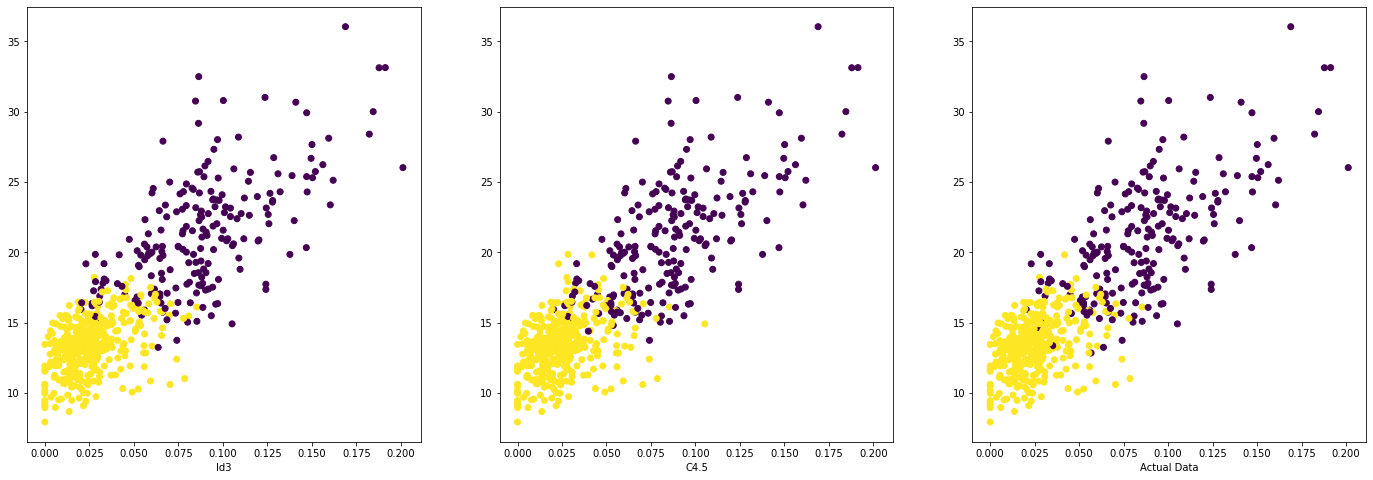

In [161]:
fig, ax = plt.subplots(1, 3, figsize = (24, 8))

ax[0].scatter(X[:, 3], X[:, 4], c=y_predall_id3)
ax[1].scatter(X[:, 3], X[:, 4], c=y_predall_c45)
ax[2].scatter(X[:, 3], X[:, 4], c=y)

ax[0].set_xlabel("Id3")
ax[1].set_xlabel("C4.5")
ax[2].set_xlabel("Actual Data");

In [167]:
y[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [168]:
y_predall_id3[:100]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1])

In [169]:
y_predall_c45[:100]

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1]